![IronHack Logo](https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/upload_d5c5793015fec3be28a63c4fa3dd4d55.png)

# Pipelines Project

## Octavio Garcia (W3)

El proyecto consiste en el desarrollo de un pipeline para el tratamiento de datos estadísticos y la extracción de conclusiones sobre los mismos. En el presente documento se describe en detalle todos los pasos realizados para luego generar los ficheros que ejecuten el pipeline (i.e.: main.py). La definición de funciones se realizará directamente en los ficheros '.py'.

### 1) Selección e importación de los datos
Se realiza una selección dentro de las posibilidades que ofrece https://www.kaggle.com. Se selecciona el dataset: **Suicide Rates Overview 1985 to 2016**. El primer paso en el pipeline corresponde a la importación de los datos (fichero .csv) y la importación de los módulos que serán necesarios para realizar los diferentes pasos del pipeline.

In [1]:
#Importación de los módulos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Lectura de los datos y creación del dataframe. 
fileName = "./datos.csv" 
df_original = pd.read_csv(fileName)

#Se hace una copia del dataframe para no corromper los datos originales.
df_raw_raw = df_original.copy()
display(df_raw_raw.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### 2) Análisis inicial de la calidad de los datos
Realizo análisis inicial para verificar que son datos que se pueden trabajar amablemente. Algunos de los pasos realizados aquí no se incluirán en el pipeline.
- Tipo de datos por columna.
- Registros duplicados.
- Tipo de datos en cada columna.
- Análisis de nulos.

In [2]:
#Tipo de datos en cada columna (atributos).
display(df_raw_raw.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [3]:
#Análisis de duplicados (no hay duplicados).
b = len(df_raw_raw)
df_raw = df_raw_raw.drop_duplicates()
a = len(df_raw)
print('Número de registros duplicados eliminados: ', str(b - a))

Número de registros duplicados eliminados:  0


In [4]:
#Análisis de nulos. Solo hay una columna con nulos pero está en torno al 70% de los valores.
null_col = df_raw.isnull().sum()
display(null_col)

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### 3) Limpieza inicial de datos
Realizo limpieza de los datos en función de la calidad de los mismos. En fases posteriores se eliminarán más datos pero solo para efectos de los análisis a realizar.
- Elimino columna 'HDI for year' ya que contiene un 70% de valores nulos.
- Elimino columna 'country-year' ya que son datos redundantes. 
- Elimino columna 'gdp_for_year' ya que son datos tipo 'object' con los que no se puede trabajar numéricamente y con el gdp per capita se pueden proponer mejores hipótesis.

In [5]:
#Elimino las columnas indicadas en la descripción de arriba.
col_clean = ['country-year','HDI for year',' gdp_for_year ($) ']
df_clean = df_raw.drop(col_clean, axis=1)
display(df_clean.head())

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


### 4) Hipótesis
Este  data set permite realizar varias propuestas de hipótesis al respecto del fenómeno de los suicidios en todo el mundo durante los últimos 30 años. En este pipeline se propone un análisis de la evolución de las tasas de suicio decada a decada en la región compuesta por paises nórdicos (Islandia, Suecia, Noruega, Finlandia, Dinamarca y Paises Bajos) y la región compuesta por los paises del sur de europa (España, Portugal, Francia, Italia y Grecia). Se utilizarán los datos normalizados (Suicidios por cada 100.000 habitantes) y se expondrán tanto los valores totales como los valores separados por generaciones y por género. 

### 5) Data wrangling
Realizo varias acciones de transformación de los datos para conseguir los 'data frames' que me permitan realizar las operaciones de análisis que pretendo y extraer conclusiones.
- Cambio la denominación de las columnas para mejor manejo y posterior presentación en informes.
- Analizo las variables de cada atributo para establecer posibles 'incosistencias' y/o 'inutilidad' de ciertos datos para mi análisis.
- Se eliminan columnas de datos que no serán utilizados para el análisis final.

In [6]:
#Renombro columnas para mejor manejo y posterior generación de informes.
df_w1 = df_clean.rename(index=str, columns={'country':'Country','year':'Year','sex':'Gender','age':'Ages',
                                            'suicides_no':'Suicides','population':'Population',
                                            'suicides/100k pop':'Suicidesx100k','gdp_per_capita ($)':'GDPxCapita',
                                            'generation':'Generation'})
display(df_w1.head())

,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [7]:
#Analizo los datos en busqueda de inconsistencias y/o datos que no me son útiles para mi análisis.
atributes = ['Country','Year','Gender','Ages','Suicides','Population','Suicidesx100k','GDPxCapita','Generation']
#print(set(df_w1['Country']))
print('Country',len(set(df_w1['Country']))) 
print(set(df_w1['Year']))
print('Year',len(set(df_w1['Year']))) 
print(set(df_w1['Gender']))
print('Gender',len(set(df_w1['Gender']))) 
print(set(df_w1['Ages']))
print('Ages',len(set(df_w1['Ages']))) 
#print(set(df_w1['Suicides']))
print('Suicides',len(set(df_w1['Suicides']))) 
#print(set(df_w1['Population']))
print('Population',len(set(df_w1['Population']))) 
#print(set(df_w1['Suicidesx100k']))
print('Suicidesx100k',len(set(df_w1['Suicidesx100k']))) 
#print(set(df_w1['GDPxCapita']))
print('GDPxCapita',len(set(df_w1['GDPxCapita']))) 
print(set(df_w1['Generation']))
print('Generation',len(set(df_w1['Generation'])))

Country 101
{1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016}
Year 32
{'male', 'female'}
Gender 2
{'35-54 years', '5-14 years', '25-34 years', '15-24 years', '55-74 years', '75+ years'}
Ages 6
Suicides 2084
Population 25564
Suicidesx100k 5298
GDPxCapita 2233
{'Boomers', 'Generation Z', 'Silent', 'Generation X', 'Millenials', 'G.I. Generation'}
Generation 6


In [8]:
#Se detecta que la columna 'Generation' es inconsistente (no se corresponde adecuadamente con la columna 'Ages'). 
#Se elimina ya que no aporta nada.
#Se exporta fichero .csv 'limpio' que se puede utilizar para análisis posteriores.
col_inconsist = ['Generation']
df_w2 = df_w1.drop(col_inconsist, axis=1)
df_w2.to_csv('/home/potacho/github/datamad0119/module-1/pipelines-project/your-code/datos_cw.csv', 
             index=False, encoding = 'utf-8')
df_w2.head()

,Country,Year,Gender,Ages,Suicides,Population,Suicidesx100k,GDPxCapita
0,Albania,1987,male,15-24 years,21,312900,6.71,796
1,Albania,1987,male,35-54 years,16,308000,5.19,796
2,Albania,1987,female,15-24 years,14,289700,4.83,796
3,Albania,1987,male,75+ years,1,21800,4.59,796
4,Albania,1987,male,25-34 years,9,274300,3.28,796


In [9]:
#También se eliminan las columnas que no van a formar parte del análisis.
#IMPORTANTE: estas columnas pueden ser utilizadas para el planteamiento de otras hipótesis (df_w2)
col_useless = ['Suicides','Population','GDPxCapita']
df_w3 = df_w2.drop(col_useless, axis=1)
df_w3.head()

,Country,Year,Gender,Ages,Suicidesx100k
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


### 6) Análisis de las hipótesis
Se crean 2 data frames diferentes (uno para cada región) a los cuales se aplican diferentes operaciones de modo de poder extraer conclusiones al respecto de la evolución de las tasas de suicidios en estas regiones. A efectos de este proyectos se proponen las siguientes visualizaciones:
- Tabla con datos de evolución por decadas de las tasas de suicidio normalizada para los paises del norte de europa.
- Tabla con datos de evolución por decadas de las tasas de suicidio normalizada para los paises del norte de europa.
- Gráfico comparativo de la evolución de cada región.

In [10]:
#Se crean los 2 dataframes (north y south)
r_north = ['Iceland','Sweden','Norway','Finland','Denmark','Norway','Netherlands']
r_south = ['Spain','Greece','Italy','Portugal','France']
r_n_s = r_north+r_south
df_north = df_w3[df_w3['Country'].isin(r_north)]
display(df_north.head())
df_south = df_w3[df_w3['Country'].isin(r_south)]
display(df_south.head())
#rows = list(set(df_w3['Country']))
#df = df_w3[df_w3['Country'].isin(r_n_s)]
#df = pd.concat([df_north,df_south])
#display(df)

,Country,Year,Gender,Ages,Suicidesx100k
7418,Denmark,1994,male,75+ years,67.58
7419,Denmark,1994,male,55-74 years,42.17
7420,Denmark,1994,male,35-54 years,36.92
7421,Denmark,1994,female,75+ years,30.36
7422,Denmark,1994,male,25-34 years,20.53


,Country,Year,Gender,Ages,Suicidesx100k
9086,France,1985,male,75+ years,120.49
9087,France,1985,male,55-74 years,52.84
9088,France,1985,male,35-54 years,40.47
9089,France,1985,male,25-34 years,35.19
9090,France,1985,female,75+ years,27.52


In [11]:
#Se crean los bins correspondientes a las decadas
decade_labels = ['1985-1995', '1996-2006', '2007-2016']
cutoffs = [1985,1996,2007,2016]
north_bins = pd.cut(df_north['Year'], cutoffs, labels=decade_labels)
south_bins = pd.cut(df_south['Year'], cutoffs, labels=decade_labels)

In [12]:
#Se agrupan los datos por decadas para north. Esta sería una de las salidas (parámetro -n) enviando un .html.
df_north['Decades'] = north_bins
df_dec_north = df_north.groupby(['Decades','Country']).sum().drop(['Year'], axis=1)
display(df_dec_north.head())
df_dec_north.to_html(open('north.html', 'w'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Suicidesx100k
Decades   Country                   
1985-1995 Denmark             721.91
          Finland            3476.27
          Iceland            1747.54
          Netherlands        1562.24
          Norway             1968.20

In [13]:
#Se agrupan los datos por decadas para south. Esta sería una de las salidas (parámetro -s) enviando un .html.
df_south['Decades'] = south_bins
df_dec_south = df_south.groupby(['Decades','Country']).sum().drop(['Year'], axis=1)
display(df_dec_south.head())
df_dec_south.to_html(open('south.html', 'w'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Suicidesx100k
Decades   Country                
1985-1995 France          3386.83
          Greece           588.66
          Italy           1321.90
          Portugal        1562.95
          Spain           1361.34

In [14]:
#Se agrupan los datos realizando una media para cada una de las regiones para realizar la comparativa.
df_eu_north = df_dec_north.groupby("Decades").agg({"Suicidesx100k":"mean"})
display(df_eu_north)
df_eu_south = df_dec_south.groupby("Decades").agg({"Suicidesx100k":"mean"})
display(df_eu_south)

,Suicidesx100k
Decades,
1985-1995,1930.678333
1996-2006,1844.055000
2007-2016,1254.860000


,Suicidesx100k
Decades,
1985-1995,1644.336
1996-2006,1277.526
2007-2016,847.426


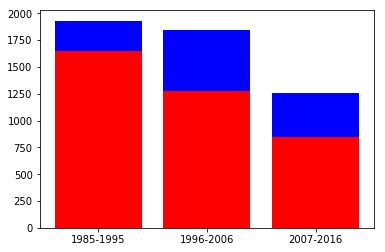

In [15]:
#Se genera gráfico que compara las dos regiones por décadas. Se envía gráfico por email (parámetro -c).
height = list(df_eu_north["Suicidesx100k"])
bars = tuple(df_eu_north.index)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['blue'])
plt.xticks(y_pos, bars)
#plt.savefig("North", bbox_inches='tight')
height = list(df_eu_south["Suicidesx100k"])
bars = tuple(df_eu_south.index)
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color=['red'])
plt.xticks(y_pos, bars)
plt.savefig("NorthVsSouth", bbox_inches='tight')

### 7) Conclusiones
A partir del análisis de los datos se ha podido ver claramente la evolución de los ratios de suicidio durante los últimos 30 años, la cual ha tenido una caída década a década. Dicha caída ha sido progresiva en los países del sur de europa, mientras que en los países del norte de europa, la caída ha sido más abrupta entre las últimas dos décadas. El pipeline ejecutará todo el código necesario para generar los dataframes de trabajo, realizará los cálculos y enviará por email cada opción en función del parámetros que se le indique en la consola. En la carpeta del proyecto se incluye:
- Este fichero .ipynb
- Una versión README.md
- Los ficheros .py que ejecutan el pipeline (e.g.: main.py, run.py,...)
- Los ficheros .html y .png que extrae el pipeline y envía por email.
- Los ficheros de datos .csv, tanto el inicial como la versión despúes de cleaning/wrangling.

### IDEAS (este apartado tiene borradores de acciones aplicadas a los datos durante el desarrollo del proyecto)

In [16]:
#Statistics
#stats = df_w2.describe().transpose()
#display(stats.head())

In [17]:
#Pivot table
table_country = pd.pivot_table(df_w2, values='Suicides', index=['Country'], columns=['Ages'],aggfunc=np.sum)
display(table_country.head())

Ages,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
Country,,,,,,
Albania,546.0,427.0,591.0,61.0,264.0,81.0
Antigua and Barbuda,0.0,1.0,6.0,0.0,4.0,0.0
Argentina,17655.0,13490.0,21781.0,1452.0,19862.0,7979.0
Armenia,175.0,290.0,649.0,24.0,574.0,193.0
Aruba,7.0,24.0,42.0,0.0,22.0,6.0


In [18]:
#Reporte de datos de Sx100k 
col_country = ['Year','Population','Suicides','GDPxCapita']
df_w3 = df_w2.drop(col_country, axis=1)
df_country = df_w3.groupby(['Country','Ages']).sum()
display(df_country.sort_values(by=['Country','Ages'], ascending=False).head())

Suicidesx100k
Country    Ages                      
Uzbekistan 75+ years           377.46
           55-74 years         416.46
           5-14 years           47.45
           35-54 years         484.06
           25-34 years         436.28

In [53]:
#df_country es el data frame de partida ordenado por paises.
df_n_s = df.groupby(['Country','Ages']).sum()
df_n_s.sort_values(by=['Country'], ascending=False).head(100)

NameError: name 'df' is not defined